importing Jupyter notebook from preprocessing.ipynb
importing Jupyter notebook from FeatureSelection.ipynb
CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1
0        Says the Annies List political group suppo

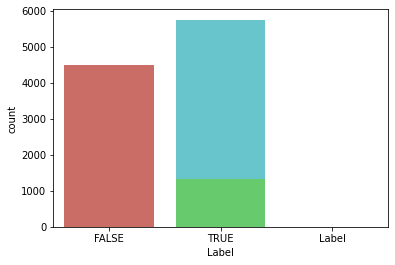

In [1]:
import import_ipynb
import preprocessing
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [4]:
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countv),
        ('svm_clf',svm.LinearSVC())
        ])

In [5]:
svm_pipeline.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('svmCV', CountVectorizer()), ('svm_clf', LinearSVC())])

In [6]:
predicted_svm = svm_pipeline.predict(preprocessing.test_news['Statement'])

In [7]:
np.mean(predicted_svm == preprocessing.test_news['Label'])

0.5723245785966288

In [8]:
sgd_pipeline = Pipeline([
        ('svm2CV',FeatureSelection.countv),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

In [9]:
sgd_pipeline.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('svm2CV', CountVectorizer()),
                ('svm2_clf', SGDClassifier(alpha=0.001))])

In [10]:
predicted_sgd = sgd_pipeline.predict(preprocessing.test_news['Statement'])

In [11]:
np.mean(predicted_sgd == preprocessing.test_news['Label'])

0.6095648765190121

In [12]:
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countv),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])

In [13]:
random_forest.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('rfCV', CountVectorizer()),
                ('rf_clf', RandomForestClassifier(n_estimators=200, n_jobs=3))])

In [14]:
predicted_rf = random_forest.predict(preprocessing.test_news['Statement'])

In [15]:
np.mean(predicted_rf == preprocessing.test_news['Label'])

0.6291650333202665

In [16]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(preprocessing.train_news):
        train_text = preprocessing.train_news.iloc[train_ind]['Statement'] 
        train_y = preprocessing.train_news.iloc[train_ind]['Label']
    
        test_text = preprocessing.train_news.iloc[test_ind]['Statement']
        test_y = preprocessing.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(preprocessing.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [17]:
build_confusion_matrix(svm_pipeline)

Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


(None, None, None, None, None)

In [18]:
build_confusion_matrix(sgd_pipeline)

Total statements classified: 10240
Score: 0.664517945109596
score length 5
Confusion matrix:
[[2155 2333]
 [1727 4025]]


(None, None, None, None, None)

In [19]:
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.7046675601048056
score length 5
Confusion matrix:
[[1823 2665]
 [1173 4579]]


(None, None, None, None, None)

In [20]:
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',FeatureSelection.tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

In [21]:
svm_pipeline_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('svm_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english')),
                ('svm_clf', LinearSVC())])

In [22]:
predicted_svm_ngram = svm_pipeline_ngram.predict(preprocessing.test_news['Statement'])

In [23]:
np.mean(predicted_svm_ngram == preprocessing.test_news['Label'])

0.6170129361034888

In [24]:
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',FeatureSelection.tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

In [25]:
sgd_pipeline_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('sgd_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english')),
                ('sgd_clf', SGDClassifier(alpha=0.001))])

In [26]:
predicted_sgd_ngram = sgd_pipeline_ngram.predict(preprocessing.test_news['Statement'])

In [27]:
np.mean(predicted_sgd_ngram == preprocessing.test_news['Label'])

0.5417483339866719

In [28]:
random_forest_ngram = Pipeline([
        ('rf_tfidf',FeatureSelection.tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])

In [29]:
random_forest_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])

Pipeline(steps=[('rf_tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english')),
                ('rf_clf', RandomForestClassifier(n_estimators=300, n_jobs=3))])

In [30]:
predicted_rf_ngram = random_forest_ngram.predict(preprocessing.test_news['Statement'])

In [31]:
np.mean(predicted_rf_ngram == preprocessing.test_news['Label'])

0.5997647981183849

In [32]:
build_confusion_matrix(svm_pipeline_ngram)

Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]


(None, None, None, None, None)

In [33]:
build_confusion_matrix(sgd_pipeline_ngram)

Total statements classified: 10240
Score: 0.7190643331130575
score length 5
Confusion matrix:
[[   5 4483]
 [   6 5746]]


(None, None, None, None, None)

In [34]:
build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
Score: 0.6579181221078907
score length 5
Confusion matrix:
[[2001 2487]
 [1713 4039]]


(None, None, None, None, None)

In [35]:
print(classification_report(preprocessing.test_news['Label'], predicted_svm_ngram))

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551



In [36]:
print(classification_report(preprocessing.test_news['Label'], predicted_sgd_ngram))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.27      0.50      0.35      2551
weighted avg       0.29      0.54      0.38      2551



/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(classification_report(preprocessing.test_news['Label'], predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.58      0.48      0.52      1169
        True       0.61      0.70      0.66      1382

    accuracy                           0.60      2551
   macro avg       0.60      0.59      0.59      2551
weighted avg       0.60      0.60      0.59      2551



In [38]:
preprocessing.test_news['Label'].shape

(2551,)

In [39]:
from sklearn.model_selection import KFold

In [40]:
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(preprocessing.test_news['Label'], classifier)
    average_precision = average_precision_score(preprocessing.test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

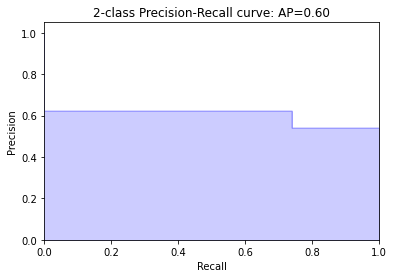

In [41]:
plot_PR_curve(predicted_svm_ngram)

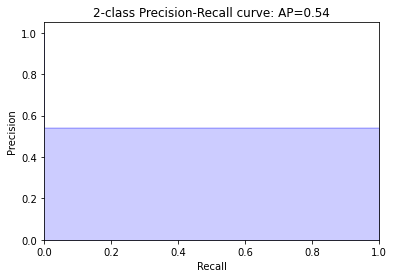

In [42]:
plot_PR_curve(predicted_sgd_ngram)

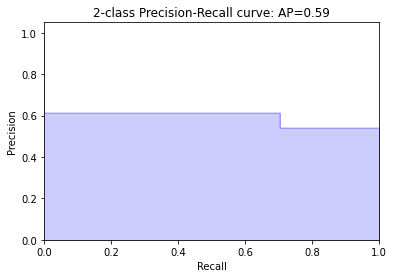

In [43]:
plot_PR_curve(predicted_rf_ngram)

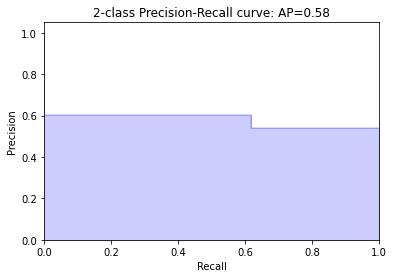

In [44]:
plot_PR_curve(predicted_svm)

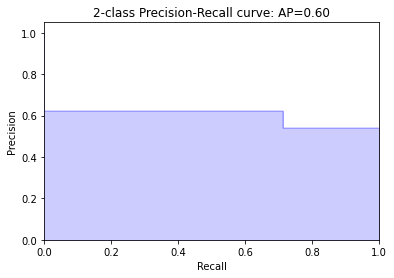

In [45]:
plot_PR_curve(predicted_sgd)

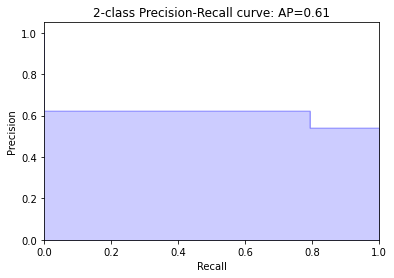

In [46]:
plot_PR_curve(predicted_rf)

In [47]:
import scikitplot.plotters as skplt

In [48]:
def plot_confusionMatrix(classifier):
    # plotting confusion matrix
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(preprocessing.train_news):
        train_text = preprocessing.train_news.iloc[train_ind]['Statement'] 
        train_y = preprocessing.train_news.iloc[train_ind]['Label']
    
        test_text = preprocessing.train_news.iloc[test_ind]['Statement']
        test_y = preprocessing.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
    skplt.plot_confusion_matrix(test_y, predictions)
    plt.show()

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


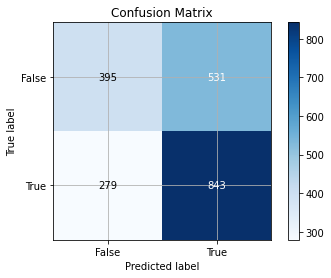

In [49]:
plot_confusionMatrix(svm_pipeline_ngram)

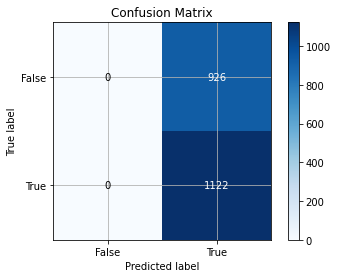

In [50]:
plot_confusionMatrix(sgd_pipeline_ngram)

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


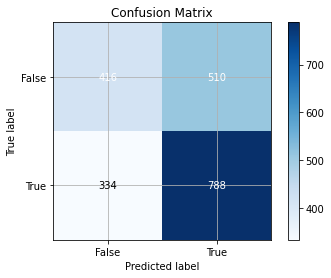

In [51]:
plot_confusionMatrix(random_forest_ngram)

In [52]:
import import_ipynb
import preprocessing
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

importing Jupyter notebook from Classification.ipynb


/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Total statements classified: 10240
Score: 0.6466692934443682
score length 5
Confusion matrix:
[[2254 2234]
 [1936 3816]]
Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62     

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


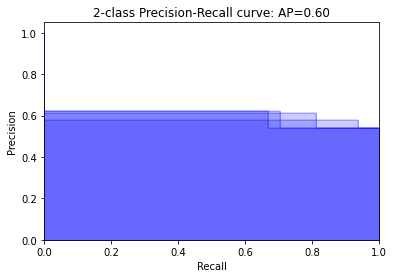

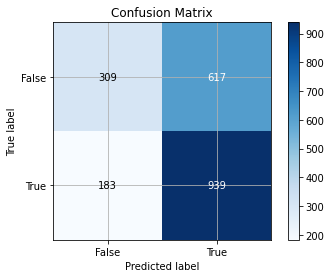

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


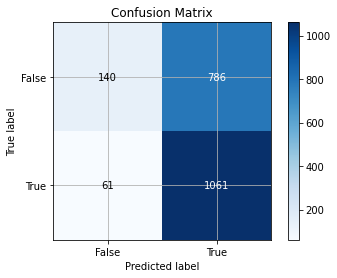

In [53]:
import Classification

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [55]:
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

In [56]:
gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(preprocessing.train_news['Statement'][:10000],preprocessing.train_news['Label'][:10000])

In [57]:
gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([1.7538969 , 1.71059704, 2.31298752, 2.2971931 , 2.87784305,
        2.81162791, 3.37452002, 3.29058461, 4.016049  , 4.16949863,
        1.81456852, 1.84674354, 2.46427221, 2.72672482, 3.08876772,
        2.94441919, 3.58386502, 3.54671607, 4.03179722, 4.09339466,
        1.96368484, 1.93447289, 2.5762958 , 2.58939381, 3.80617461,
        3.29201546, 4.1095397 , 3.72974844, 5.75283852, 6.02450643,
        3.29369359, 3.26902685, 3.37649283, 3.18812318, 3.74252162,
        3.69762478, 4.98882427, 4.32541218, 4.90603065, 4.60471792,
        2.11654758, 2.06416116, 2.78316326, 2.79697857, 3.46649723,
        3.42464824, 3.98705707, 3.9096663 , 5.14220877, 4.85888367,
        2.20223064, 2.21172495, 2.96492891, 2.97487235, 3.58205957,
        3.77022181, 4.26243439, 4.13750205, 4.8016583 , 4.87632513,
        2.26698952, 2.26658611, 3.04455543, 3.11402559, 3.82346258,
        3.80751262, 4.62964759, 4.56566243, 5.46361818, 5.9371428 ,
        2.34341583, 2.40383773,

In [58]:
#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

In [59]:
import import_ipynb
import preprocessing
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [60]:
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countv),
        ('LogR_clf',LogisticRegression())
        ])

In [61]:
logR_pipeline.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_LogR = logR_pipeline.predict(preprocessing.test_news['Statement'])
np.mean(predicted_LogR == preprocessing.test_news['Label'])

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6013328106624853

In [62]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',FeatureSelection.tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

In [63]:
logR_pipeline_ngram.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(preprocessing.test_news['Statement'])
np.mean(predicted_LogR_ngram == preprocessing.test_news['Label'])

0.6193649549196394

In [64]:
gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(preprocessing.train_news['Statement'][:10000],preprocessing.train_news['Label'][:10000])

In [65]:
gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([  0.76590357,   0.66134672,   0.72184119,   0.61919093,
          2.10160961,   2.26362748,   2.12580652,   2.40525055,
          3.37625151,   3.8831171 ,   3.02975101,   4.00976324,
          4.51745877,   4.72817316,   4.18895226,   4.64211378,
        180.98754425,   7.5047554 ,   5.98188558,   5.6370574 ]),
 'std_fit_time': array([4.79158727e-02, 6.39836404e-02, 2.00093737e-02, 2.21949375e-02,
        5.63687851e-02, 6.90291107e-02, 1.10315980e-01, 1.17200171e-01,
        2.59059382e-01, 1.58386148e-01, 2.31831827e-01, 3.64069118e-01,
        5.09459969e-01, 3.89070229e-01, 2.42784852e-01, 3.37228497e-01,
        8.75551489e+01, 1.82210620e+00, 3.13832739e-01, 9.49979940e-01]),
 'mean_score_time': array([0.09439697, 0.08954191, 0.0854938 , 0.08494267, 0.143505  ,
        0.15094042, 0.15572705, 0.15024118, 0.19267383, 0.18183122,
        0.19741549, 0.17450609, 0.20488749, 0.22124581, 0.21966062,
        0.19832153, 1.02426386, 0.23314347, 0.26640058, 0.19

In [66]:
random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
        ])
import import_ipynb
import preprocessing
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [67]:
random_forest_final.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_rf_final = random_forest_final.predict(preprocessing.test_news['Statement'])
np.mean(predicted_rf_final == preprocessing.test_news['Label'])
print(classification_report(preprocessing.test_news['Label'], predicted_rf_final))

              precision    recall  f1-score   support

       False       0.50      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.52      0.50      0.35      2551
weighted avg       0.52      0.54      0.38      2551



In [68]:
logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

In [69]:
logR_pipeline_final.fit(preprocessing.train_news['Statement'],preprocessing.train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(preprocessing.test_news['Statement'])
np.mean(predicted_LogR_final == preprocessing.test_news['Label'])
#accuracy = 0.62
print(classification_report(preprocessing.test_news['Label'], predicted_LogR_final))

              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [70]:
#saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))

In [71]:
import pickle

In [72]:
#doc_new = ['obama is running for president in 2016']

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Global warming's extreme rains threaten Hawaii's coral reefs1 sec ago.
You entered: Global warming's extreme rains threaten Hawaii's coral reefs1 sec ago.


In [73]:
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)

The given statement is  True
The truth probability score is  0.5264706897157876


In [74]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Body of US Capitol Officer William Evans returns to hometown.
You entered: Body of US Capitol Officer William Evans returns to hometown.


In [75]:
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)

The given statement is  False
The truth probability score is  0.46566477876830414


In [76]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: US seeks greater but vaguely-defined role for India and other regional powers in Afghanistan.
You entered: US seeks greater but vaguely-defined role for India and other regional powers in Afghanistan.


In [77]:
if __name__ == '__main__':
    detecting_fake_news(var)

The given statement is  True
The truth probability score is  0.6799274323209349


In [78]:
def detecting_fake_news(var):    
#retrieving the best model after making the comparison or prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The news provided by the user to check is ",prediction[0]),
        print("The truth probability score of the given news is ",prob[0][1]))

In [79]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.6799274323209349


In [80]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Derek Chauvin won't testify at murder trial in George Floyd's death.
You entered: Derek Chauvin won't testify at murder trial in George Floyd's death.


In [81]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.646480545845465


In [82]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Study shows vaccines carry much lower risk of blood clots than COVID
You entered: Study shows vaccines carry much lower risk of blood clots than COVID


In [83]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.5662879928080842


In [84]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Johnson & Johnson's COVID-19 vaccine remained in limbo on Wednesday as a U.S. health panel called for more data before making a decision
You entered: Johnson & Johnson's COVID-19 vaccine remained in limbo on Wednesday as a U.S. health panel called for more data before making a decision


In [85]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.5577686406348528


In [86]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: The United States is preparing for the possibility that a booster shot will be needed between nine to 12 months after people are initially vaccinated against COVID-19
You entered: The United States is preparing for the possibility that a booster shot will be needed between nine to 12 months after people are initially vaccinated against COVID-19


In [87]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.7577671701543341


In [88]:
def fake_news_detection(var1):    
#retrieving the best model after making the comparison or prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The news provided by the user to check the authenticity ",prediction[0]),
        print("The truth probability score of the given news is ",prob[0][1]))

In [90]:
var1 = input("Please enter the news text you want to verify: ")
print("News entered: " + str(var1))

Please enter the news text you want to verify: A gunman shot eight people dead and injured several others at a FedEx facility in Indianapolis before taking his own life, police said early on Friday.
News entered: A gunman shot eight people dead and injured several others at a FedEx facility in Indianapolis before taking his own life, police said early on Friday.


In [91]:
if __name__ == '__main__':
    fake_news_detection(var1)

The news provided by the user to check the authenticity  True
The truth probability score of the given news is  0.7577671701543341


In [92]:
var1 = input("Please enter the news text you want to verify: ")
print("News entered: " + str(var1))

Please enter the news text you want to verify: Anthony Fauci, the top U.S. infectious disease doctor, hopes U.S. regulators will make a quick decision to lift a pause on the Johnson & Johnson vaccine and get that vaccine "back on track," he said in an interview with Reuters on Thursday.
News entered: Anthony Fauci, the top U.S. infectious disease doctor, hopes U.S. regulators will make a quick decision to lift a pause on the Johnson & Johnson vaccine and get that vaccine "back on track," he said in an interview with Reuters on Thursday.


In [93]:
if __name__ == '__main__':
    fake_news_detection(var1)

The news provided by the user to check the authenticity  True
The truth probability score of the given news is  0.7577671701543341


In [94]:
var1 = input("Please enter the news text you want to verify: ")
print("News entered: " + str(var1))

Please enter the news text you want to verify: CM Uddhav Thackeray to chair meeting with BMC to review COVID-19 situation
News entered: CM Uddhav Thackeray to chair meeting with BMC to review COVID-19 situation


In [95]:
if __name__ == '__main__':
    fake_news_detection(var1)

The news provided by the user to check the authenticity  True
The truth probability score of the given news is  0.7577671701543341


In [96]:
var1 = input("Please enter the news text you want to verify: ")
print("News entered: " + str(var1))

Please enter the news text you want to verify: modi is pm of India.
News entered: modi is pm of India.


In [97]:
if __name__ == '__main__':
    fake_news_detection(var1)

The news provided by the user to check the authenticity  True
The truth probability score of the given news is  0.7577671701543341


In [98]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: The former Minnesota police officer charged with manslaughter in the fatal shooting of a young Black man
You entered: The former Minnesota police officer charged with manslaughter in the fatal shooting of a young Black man


In [99]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.6240128052707995


In [100]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: The United States is preparing for the possibility that a booster shot will be needed between nine to 12 months after people are initially vaccinated against COVID-19, a White House official said on Thursday.
You entered: The United States is preparing for the possibility that a booster shot will be needed between nine to 12 months after people are initially vaccinated against COVID-19, a White House official said on Thursday.


In [101]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.6287866054417321


In [102]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Donald trump os dead
You entered: Donald trump os dead


In [103]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Donald trump is dead
You entered: Donald trump is dead


In [104]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.735198594937293


In [105]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Global warming's extreme rains threaten Hawaii's coral reefs1 sec ago.
You entered: Global warming's extreme rains threaten Hawaii's coral reefs1 sec ago.


In [106]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  True
The truth probability score of the given news is  0.5264706897157876


In [107]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Body of US Capitol Officer William Evans returns to hometown. You entered: Body of US Capitol Officer William Evans returns to hometown.
You entered: Body of US Capitol Officer William Evans returns to hometown. You entered: Body of US Capitol Officer William Evans returns to hometown.


In [108]:
if __name__ == '__main__':
    detecting_fake_news(var)

The news provided by the user to check is  False
The truth probability score of the given news is  0.4770503526807157
